In [164]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 4 - Principal Eigenvector of a Matrix Sequence
#
# Author: Chanchal Chatterjee
#

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [134]:
# Number of samples N and dimension D
nSamples = 1000
nDim     = 10
nEpochs  = 1

In [135]:
# Generate the covX random matrices
cov = 3*np.array([ \
    [ 0.4270,  0.0110, -0.0050, -0.0250,  0.0890, -0.0790, -0.0190,  0.0740,  0.0890,  0.0050 ], \
    [ 0.0110,  5.6900, -0.0690, -0.2820, -0.7310,  0.0900, -0.1240,  0.1000,  0.4320, -0.1030 ], \
    [-0.0050, -0.0690,  0.0800,  0.0980,  0.0450, -0.0410,  0.0230,  0.0220, -0.0350,  0.0120 ], \
    [-0.0250, -0.2820,  0.0980,  2.8000, -0.1070,  0.1500, -0.1930,  0.0950, -0.2260,  0.0460 ], \
    [ 0.0890, -0.7310,  0.0450, -0.1070,  3.4400,  0.2530,  0.2510,  0.3160,  0.0390, -0.0100 ], \
    [-0.0790,  0.0900, -0.0410,  0.1500,  0.2530,  2.2700, -0.1800,  0.2950, -0.0390, -0.1130 ], \
    [-0.0190, -0.1240,  0.0230, -0.1930,  0.2510, -0.1800,  0.3270,  0.0270,  0.0260, -0.0160 ], \
    [ 0.0740,  0.1000,  0.0220,  0.0950,  0.3160,  0.2950,  0.0270,  0.7270, -0.0960, -0.0170 ], \
    [ 0.0890,  0.4320, -0.0350, -0.2260,  0.0390, -0.0390,  0.0260, -0.0960,  0.7150, -0.0090 ], \
    [ 0.0050, -0.1030,  0.0120,  0.0460, -0.0100, -0.1130, -0.0160, -0.0170, -0.0090,  0.0650 ]])
print(cov/3)

[[ 4.27e-01  1.10e-02 -5.00e-03 -2.50e-02  8.90e-02 -7.90e-02 -1.90e-02
   7.40e-02  8.90e-02  5.00e-03]
 [ 1.10e-02  5.69e+00 -6.90e-02 -2.82e-01 -7.31e-01  9.00e-02 -1.24e-01
   1.00e-01  4.32e-01 -1.03e-01]
 [-5.00e-03 -6.90e-02  8.00e-02  9.80e-02  4.50e-02 -4.10e-02  2.30e-02
   2.20e-02 -3.50e-02  1.20e-02]
 [-2.50e-02 -2.82e-01  9.80e-02  2.80e+00 -1.07e-01  1.50e-01 -1.93e-01
   9.50e-02 -2.26e-01  4.60e-02]
 [ 8.90e-02 -7.31e-01  4.50e-02 -1.07e-01  3.44e+00  2.53e-01  2.51e-01
   3.16e-01  3.90e-02 -1.00e-02]
 [-7.90e-02  9.00e-02 -4.10e-02  1.50e-01  2.53e-01  2.27e+00 -1.80e-01
   2.95e-01 -3.90e-02 -1.13e-01]
 [-1.90e-02 -1.24e-01  2.30e-02 -1.93e-01  2.51e-01 -1.80e-01  3.27e-01
   2.70e-02  2.60e-02 -1.60e-02]
 [ 7.40e-02  1.00e-01  2.20e-02  9.50e-02  3.16e-01  2.95e-01  2.70e-02
   7.27e-01 -9.60e-02 -1.70e-02]
 [ 8.90e-02  4.32e-01 -3.50e-02 -2.26e-01  3.90e-02 -3.90e-02  2.60e-02
  -9.60e-02  7.15e-01 -9.00e-03]
 [ 5.00e-03 -1.03e-01  1.20e-02  4.60e-02 -1.00e-02 -1.

In [136]:
from scipy.linalg import eigh

eigvals, eigvecs = eigh(cov)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
np.random.seed(1)
R = np.random.normal(0, 1, (nDim, nSamples))
X = V @ D @ R


eigvals =
 [17.90133833 10.22120991  8.60784587  6.53607089  2.23956443  1.83686292
  1.1360816   0.76926447  0.22448354  0.15027803]


In [137]:
# Square root of the correlation matrix
from scipy.linalg import eigh

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvals, eigvecs = eigh(corX)
print("eigvals =\n", eigvals[::-1])

EstV = np.fliplr(eigvecs)
EstD  = np.diag(eigvals[::-1])


eigvals =
 [18.68095205  9.8049719   8.94149154  6.32545631  2.10456176  1.99209467
  1.07079081  0.78776781  0.21816417  0.14383263]


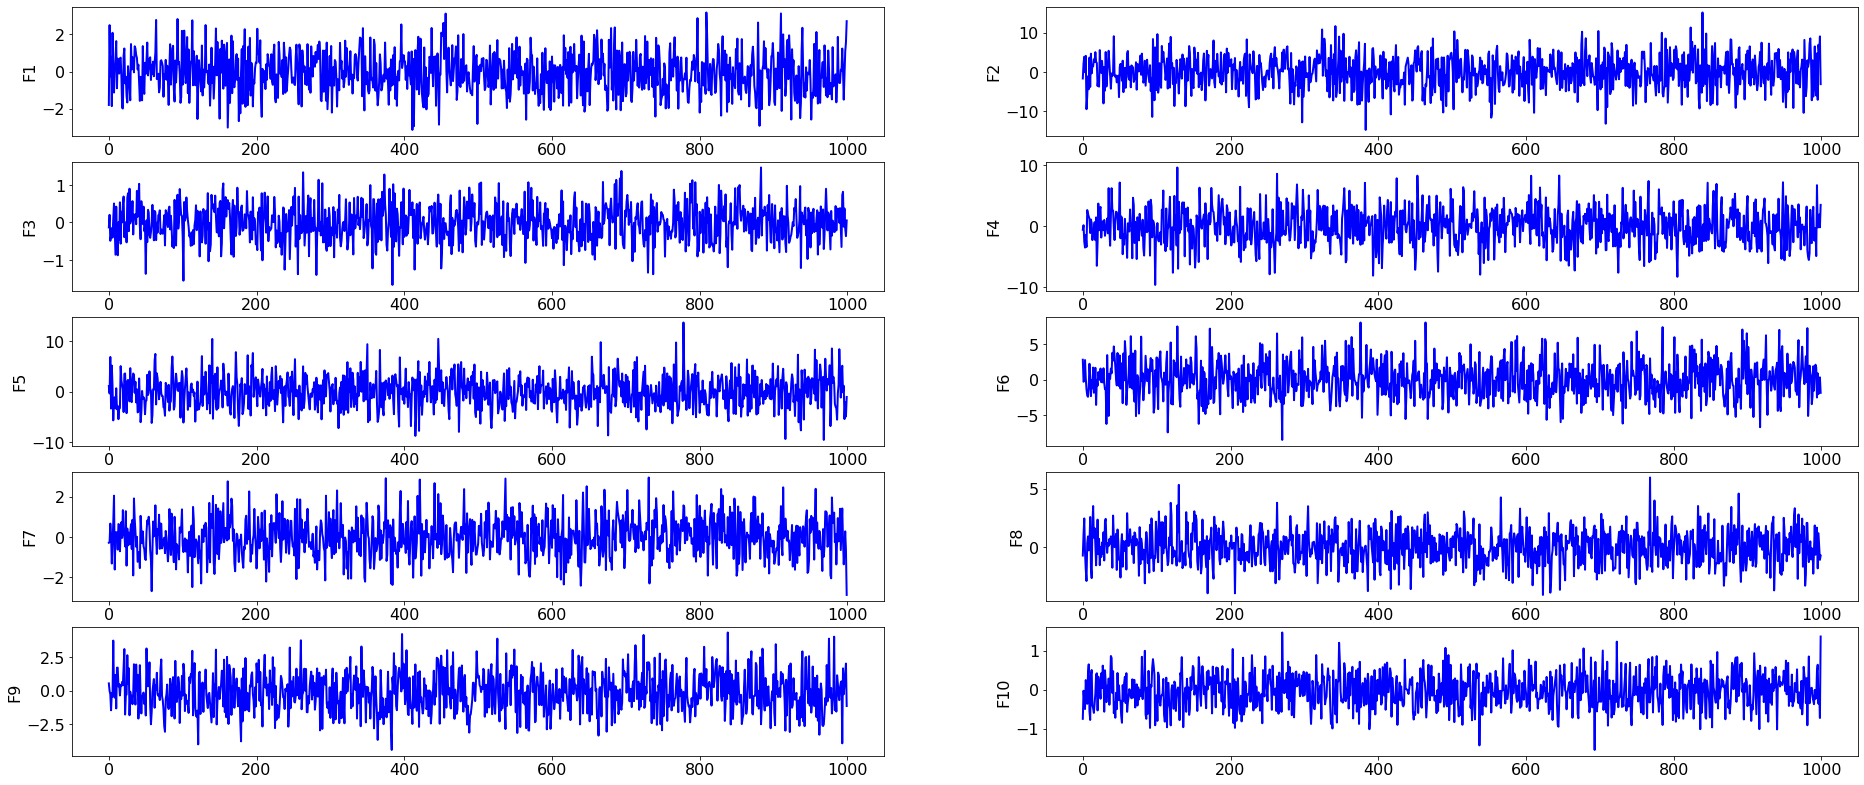

In [138]:
# Plot the data
dataset = pd.DataFrame(X.T, columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10'])
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()

In [139]:
# Adaptive algorithm
from numpy import linalg as la

mu = 10
A = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
w = 0.1 * np.ones(shape=(nDim,11)) # weight vectors of all algorithms
cos_t = np.zeros(shape=(11, nSamples*nEpochs)) # cosine error

for epoch in range(nEpochs):
    for iter in range(nSamples):
        cnt = nSamples*epoch + iter

        x = X[:,iter]
        x = x.reshape(nDim,1)
        A = A + (1.0/(1 + cnt))*((np.dot(x, x.T)) - A)

        # OJA
        v = w[:,0].reshape(nDim, 1)
        v = v + (1/(10+cnt))*(A @ v - v @ (v.T @ A @ v))
        w[:,0] = v.reshape(nDim)

        # OJAN
        v = w[:,1].reshape(nDim, 1)
        v = v + (1/(10+cnt))*(A @ v - v @ ((v.T @ A @ v) / (v.T @ v)) )
        w[:,1] = v.reshape(nDim)

        # LUO
        v = w[:,2].reshape(nDim, 1)
        v = v + (1/(1+cnt))*(A @ v * (v.T @ v) - v @ (v.T @ A @ v))
        w[:,2] = v.reshape(nDim)
     
        # RQ
        v = w[:,3].reshape(nDim, 1)
        v = v + (1/(10+cnt))*(A @ v - v @ ((v.T @ A @ v) / (v.T @ v)) )
        w[:,3] = v.reshape(nDim)

        # OJA+
        v = w[:,4].reshape(nDim, 1)
        v = v + (1/(10+cnt))*(A @ v - v @ (v.T @ A @ v) - v @ (1 - v.T @ v))
        w[:,4] = v.reshape(nDim)
 
        # IT
        v = w[:,5].reshape(nDim, 1)
        v = v + (4/(1+cnt))*((A @ v / (v.T @ A @ v)) - v)
        w[:,5] = v.reshape(nDim)

        # XU
        v = w[:,6].reshape(nDim, 1)
        v = v + (1/(50+cnt))*(2 * A @ v - v @ (v.T @ A @ v) - A @ v @ (v.T @ v))
        w[:,6] = v.reshape(nDim)

        # PF
        v = w[:,7].reshape(nDim, 1)
        v = v + (1/(50+cnt)) * (A @ v - mu * v @ (v.T @ v - 1))
        w[:,7] = v.reshape(nDim)

        # AL1
        v = w[:,8].reshape(nDim, 1)
        v = v + (1/(50+cnt)) * (A @ v - v @ (v.T @ A @ v) - mu * v @ (v.T @ v - 1))
        w[:,8] = v.reshape(nDim)

        # AL2
        v = w[:,9].reshape(nDim, 1)
        v = v + (1/(50+cnt))*(2 * A @ v - v @ (v.T @ A @ v) - A @ v @ (v.T @ v) - mu * v @ (v.T @ v - 1))
        w[:,9] = v.reshape(nDim)

        # FENG
        v = w[:,10].reshape(nDim, 1)
        v = v + (1.0/(50+cnt))*((v.T @ v) * A @ v - v)
        w[:,10] = v.reshape(nDim)


        v0 = EstV[:,0].reshape(nDim,1)
        for i in range(11):
            u = w[:,i] / la.norm(w[:,i])
            u = u.reshape(nDim,1)
            cos_t[i,cnt] = abs(u.T @ v0)


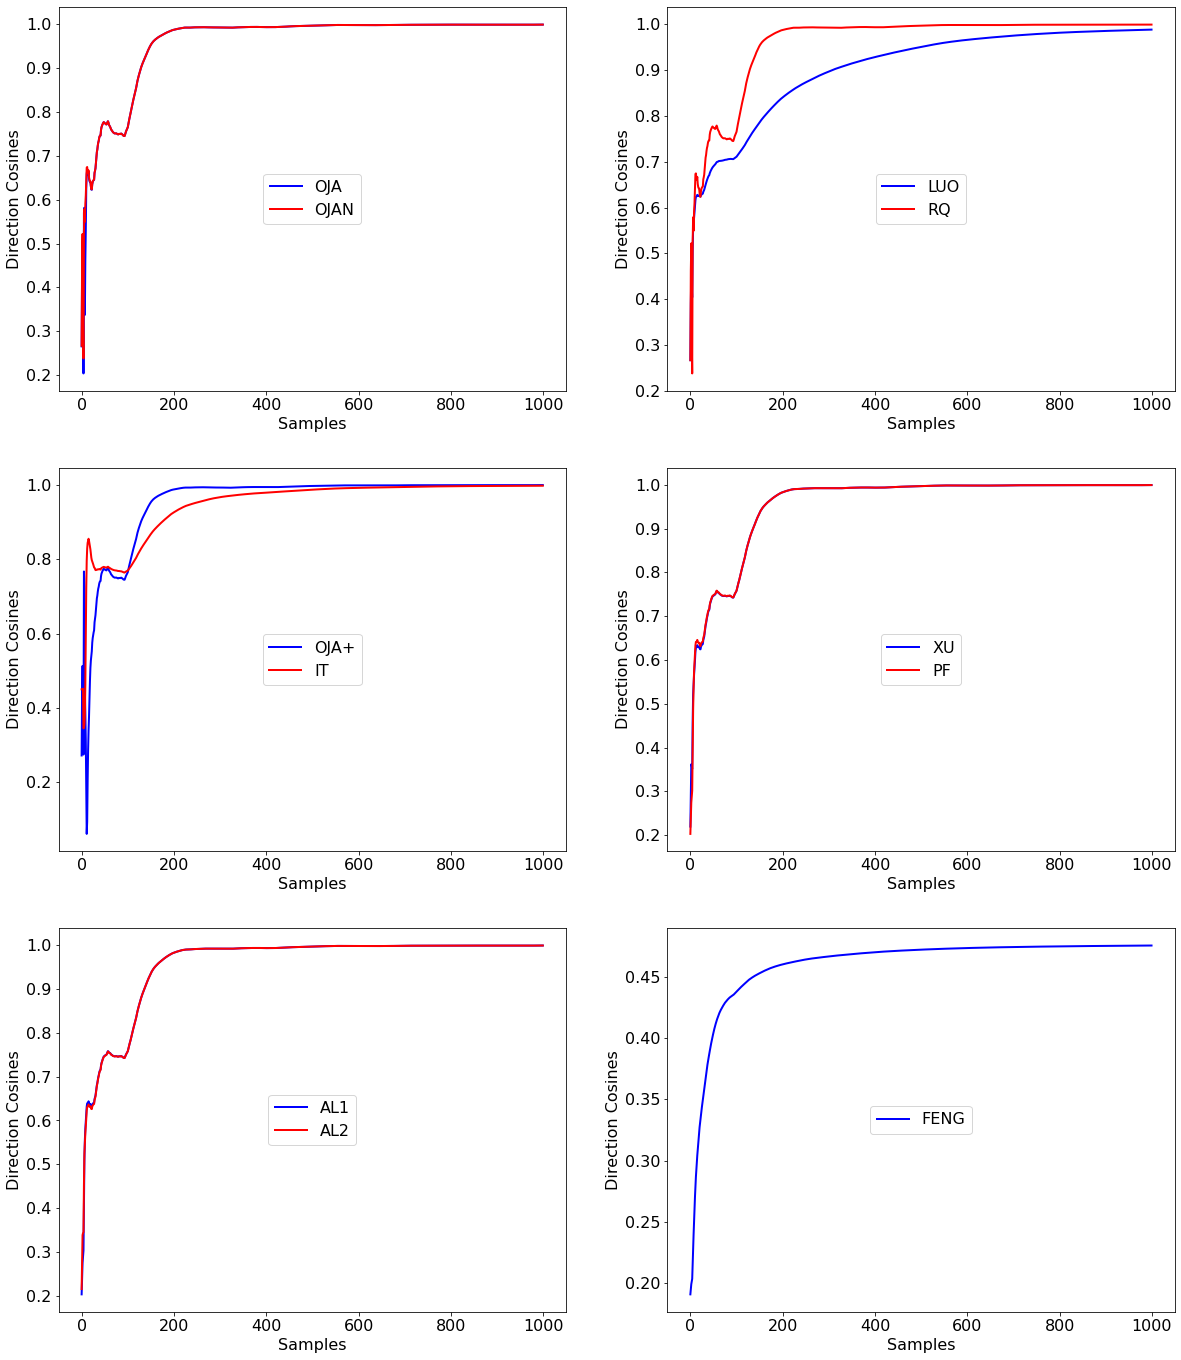

In [140]:
plt.figure(figsize=(20, 24))
plt.rcParams.update({'font.size': 16})

plt.subplot(3, 2, 1)
plt.plot(cos_t[0,:], lw=2, color='b', label="OJA")
plt.plot(cos_t[1,:], lw=2, color='r', label="OJAN")
plt.ylabel('Direction Cosines')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(3, 2, 2)
plt.plot(cos_t[2,:], lw=2, color='b', label="LUO")
plt.plot(cos_t[3,:], lw=2, color='r', label="RQ")
plt.ylabel('Direction Cosines')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(3, 2, 3)
plt.plot(cos_t[4,:], lw=2, color='b', label="OJA+")
plt.plot(cos_t[5,:], lw=2, color='r', label="IT")
plt.ylabel('Direction Cosines')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(3, 2, 4)
plt.plot(cos_t[6,:], lw=2, color='b', label="XU")
plt.plot(cos_t[7,:], lw=2, color='r', label="PF")
plt.ylabel('Direction Cosines')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(3, 2, 5)
plt.plot(cos_t[8,:], lw=2, color='b', label="AL1")
plt.plot(cos_t[9,:], lw=2, color='r', label="AL2")
plt.ylabel('Direction Cosines')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(3, 2, 6)
plt.plot(cos_t[10,:], lw=2, color='b', label="FENG")
plt.ylabel('Direction Cosines')
plt.xlabel('Samples')
plt.legend(loc="center")


plt.show()